# Food Retail in Philadelphia 
## Deja McCauley
### UP221 GIS Midterm
#### This notebook will explore Philadelphias access to low produce and high produce supply stores
##### Research Question: what community needs emerge as a priority for North Philadelphia’s Logan neighborhood when using indicators (race, unemployment, food accessibility, open space access, and housing) to compare the area to the city as a whole?
##### Data Sources: Open Data Philly 

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(
    'data/NeighborhoodFoodRetail.csv',
    dtype= 
    {
        'GEOID10':str
        
    }
)

In [3]:
df.head(1)

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length
0,1,421010108001,No,25.0,30.674847,2.5,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044


In [4]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  1336 non-null   int64  
 1   GEOID10                   1336 non-null   object 
 2   NON_RESIDENTIAL           1336 non-null   object 
 3   TOTAL_LPSS                1325 non-null   float64
 4   LPSS_PER1000              1325 non-null   float64
 5   TOTAL_HPSS                1325 non-null   float64
 6   HPSS_PER1000              1325 non-null   float64
 7   PCT_HPSS                  1325 non-null   float64
 8   HPSS_ACCESS               1325 non-null   object 
 9   SUPERMARKET_ACCESS        1325 non-null   object 
 10  PCT_VEHICLE_AVAILABILITY  1326 non-null   float64
 11  TOTAL_RESTAURANTS         1336 non-null   int64  
 12  PCT_POVERTY               1327 non-null   float64
 13  HIGH_POVERTY              1327 non-null   object 
 14  Shape__A

In [5]:
#define columns to keep
columns_to_keep=['GEOID10',
                 'TOTAL_LPSS',
                 'LPSS_PER1000',
                 'TOTAL_HPSS',
                 'HPSS_PER1000',
                 'PCT_HPSS',
                 'PCT_VEHICLE_AVAILABILITY',
                 'TOTAL_RESTAURANTS',
                 'PCT_POVERTY',
                 'Shape__Area',
                 'Shape__Length',]
                 
#add it to a new dataframe
df2=df[columns_to_keep]

In [6]:
#look at columns in new dataframe, same as df.columns.to_list
columns=list(df2)
columns

['GEOID10',
 'TOTAL_LPSS',
 'LPSS_PER1000',
 'TOTAL_HPSS',
 'HPSS_PER1000',
 'PCT_HPSS',
 'PCT_VEHICLE_AVAILABILITY',
 'TOTAL_RESTAURANTS',
 'PCT_POVERTY',
 'Shape__Area',
 'Shape__Length']

In [7]:
df2.columns=['FIPS',
             'Total Low Produce Supply',
             'Low Produce Supply Per 1000',
             'Total High Produce Supply',
             'High Produce Supply Per 1000',
             'Percent High Produce Supply',
             'Percent Vehicle Availability',
             'Total Restaurants',
             'Percent Poverty',
             'Shape Area',
             'Shape length']
       

In [8]:
df2.sample(5)

,FIPS,Total Low Produce Supply,Low Produce Supply Per 1000,Total High Produce Supply,High Produce Supply Per 1000,Percent High Produce Supply,Percent Vehicle Availability,Total Restaurants,Percent Poverty,Shape Area,Shape length
1165,421010260002,6.0,6.734007,1.25,1.402918,17.241379,76.964770,0,14.141414,191068.636719,2082.451711
480,421010298003,17.0,30.909091,0.00,0.000000,0.000000,65.656566,0,5.636364,149204.253906,1793.839766
1209,421010252004,18.0,17.110266,2.00,1.901141,10.000000,58.422939,0,12.072243,143468.667969,1755.040312
1176,421010357022,6.0,2.483444,0.00,0.000000,0.000000,85.042333,0,21.895695,550323.601562,4880.741640
285,421010008034,67.0,169.620253,18.00,45.569620,21.176471,43.497758,8,15.189873,28544.824219,714.420557


In [9]:
# accessing a single column, percent hpss
df2['Percent High Produce Supply'].head()

0     9.090909
1     7.692308
2     6.666667
3    15.492958
4    12.820513
Name: Percent High Produce Supply, dtype: float64

In [10]:
df2['Percent High Produce Supply'].mean() #11.8% people in philly have access to high produce 

11.8199793737283

In [11]:
df2['Percent High Produce Supply'].describe()

count    1325.000000
mean       11.819979
std         9.602760
min         0.000000
25%         5.555556
50%         9.677419
75%        15.789474
max        80.952381
Name: Percent High Produce Supply, dtype: float64

In [12]:
df_sorted= df2.sort_values(by= 'Total Low Produce Supply',ascending= False)

In [13]:
#display a few columns of the data 
df_sorted[['Total Low Produce Supply','Total High Produce Supply']].head(6)

,Total Low Produce Supply,Total High Produce Supply
1026,148.0,23.75
722,140.0,8.75
303,133.0,24.00
189,125.0,27.50
208,123.0,27.00
187,120.0,17.75


<AxesSubplot: ylabel='Frequency'>

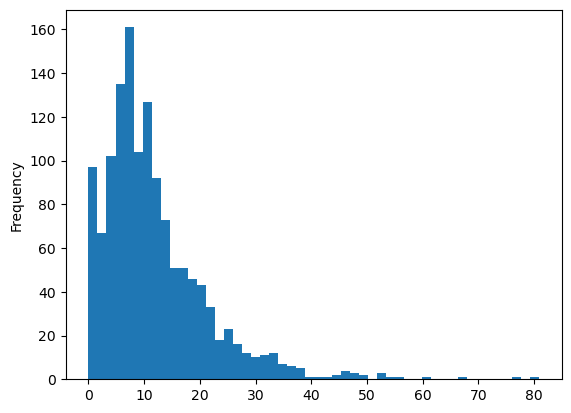

In [14]:
#shows percent of people that have access to high produce supply in Philly
df2['Percent High Produce Supply'].plot.hist(bins=50) 

<AxesSubplot: xlabel='Total Low Produce Supply', ylabel='Total High Produce Supply'>

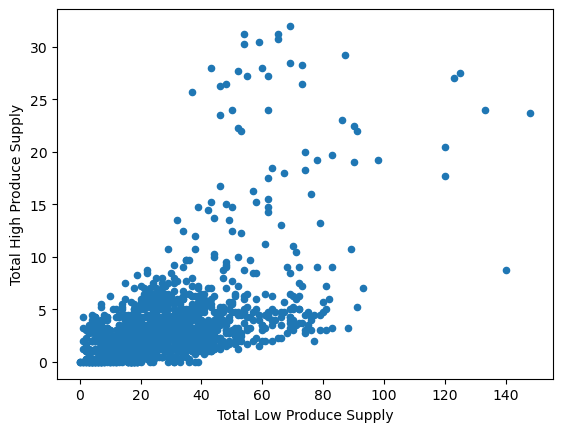

In [15]:
df2.plot.scatter(x='Total Low Produce Supply',y='Total High Produce Supply')

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019'}, xlabel='Total Low Produce Supply', ylabel='Total High Produce Supply'>

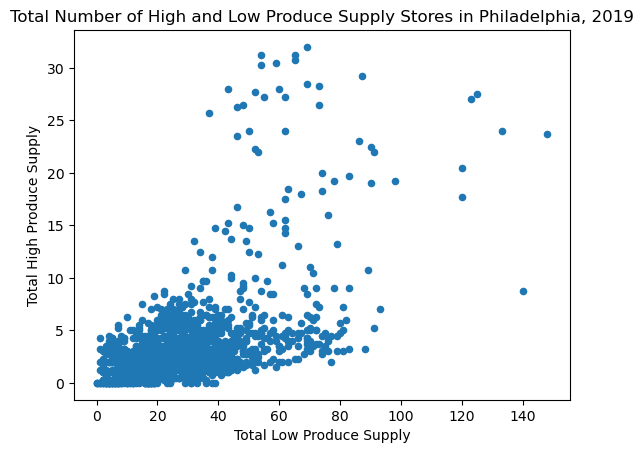

In [16]:
df2.plot.scatter(x='Total Low Produce Supply',
                             y= 'Total High Produce Supply',
                             title= 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019',
                             cmap= 'GnBu')

<AxesSubplot: title={'center': 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019'}, xlabel='Total Low Produce Supply', ylabel='Total High Produce Supply'>

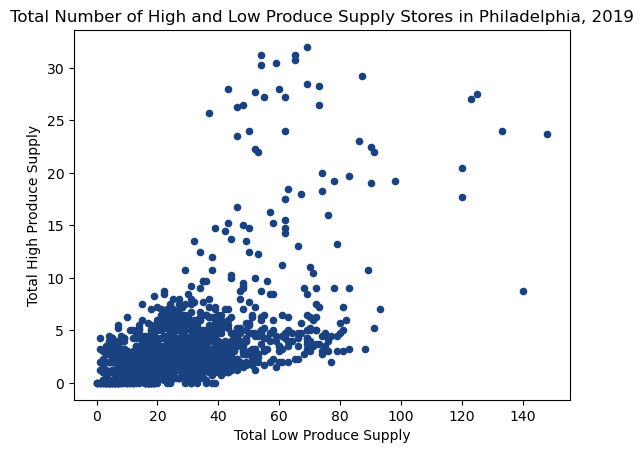

In [17]:
df2.plot.scatter(x='Total Low Produce Supply',
                             y= 'Total High Produce Supply',
                             title= 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019',
                             color= '#1a4280ff')

<AxesSubplot: title={'center': 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019'}, xlabel='Total Low Produce Supply', ylabel='Total High Produce Supply'>

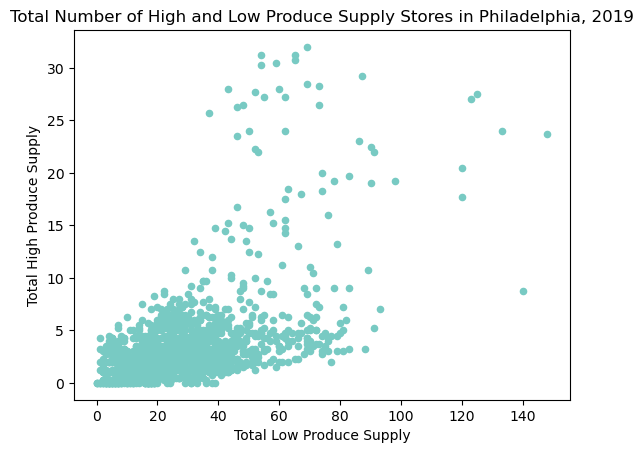

In [18]:
df2.plot.scatter(x='Total Low Produce Supply',
                             y= 'Total High Produce Supply',
                             title= 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019',
                             color= '#78cac3ff')

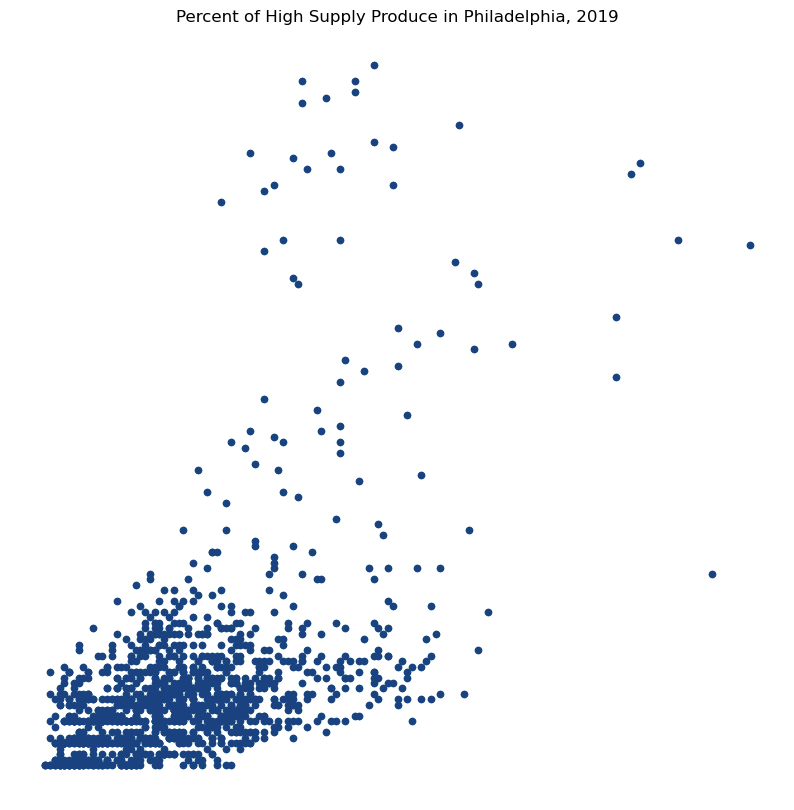

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
df2.plot.scatter(ax=ax,
         x='Total Low Produce Supply',
         y= 'Total High Produce Supply',        
         color='#78cac3ff',
         legend=True,)

df2.plot.scatter(ax=ax,
         x='Total Low Produce Supply',
         y= 'Total High Produce Supply',        
         color='#1a4280ff',
         legend=True,)        

# add a title
ax.set_title('Percent of High Supply Produce in Philadelphia, 2019')

# get rid of the axis
ax.axis('off');

In [23]:
#read in a gejson file downloaded from the philly open data portal census block data 
blocks=gpd.read_file('data/Census_Block_Groups_2010.geojson')
blocks.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape__Area,Shape__Length,geometry
0,1,42,101,010800,1,421010108001,Block Group 1,G5030,S,161887,0,+39.9687580,-075.1997251,1.742508e+06,8200.327170,"POLYGON ((-75.19851 39.96945, -75.19744 39.969..."
1,2,42,101,010800,2,421010108002,Block Group 2,G5030,S,103778,0,+39.9665475,-075.2004455,1.117026e+06,4364.980144,"POLYGON ((-75.19783 39.96571, -75.20006 39.965..."
2,3,42,101,010900,2,421010109002,Block Group 2,G5030,S,43724,0,+39.9642929,-075.1896435,4.706347e+05,3048.109084,"POLYGON ((-75.18766 39.96450, -75.18755 39.963..."
3,4,42,101,011000,2,421010110002,Block Group 2,G5030,S,108966,0,+39.9753585,-075.2113476,1.172871e+06,5169.004282,"POLYGON ((-75.20984 39.97351, -75.21221 39.973..."
4,5,42,101,011000,1,421010110001,Block Group 1,G5030,S,142244,0,+39.9724202,-075.2051689,1.531076e+06,10476.574129,"POLYGON ((-75.19855 39.97330, -75.19854 39.973..."


<AxesSubplot: >

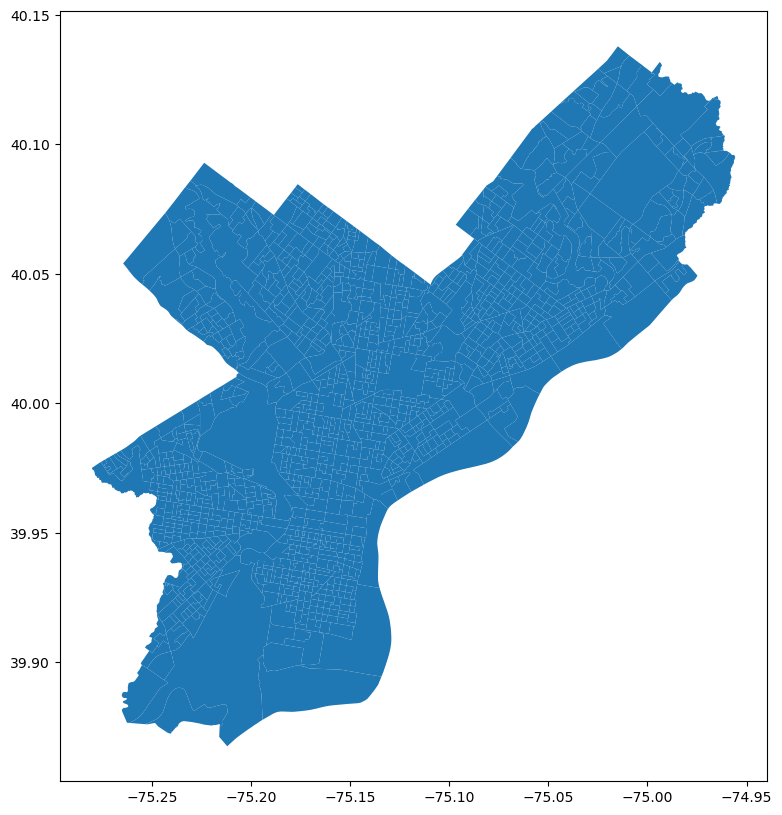

In [24]:
blocks.plot(figsize=(12,10)) #plot blocks

In [25]:
#more about the data 
blocks.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       1336 non-null   int64   
 1   STATEFP10      1336 non-null   object  
 2   COUNTYFP10     1336 non-null   object  
 3   TRACTCE10      1336 non-null   object  
 4   BLKGRPCE10     1336 non-null   object  
 5   GEOID10        1336 non-null   object  
 6   NAMELSAD10     1336 non-null   object  
 7   MTFCC10        1336 non-null   object  
 8   FUNCSTAT10     1336 non-null   object  
 9   ALAND10        1336 non-null   int64   
 10  AWATER10       1336 non-null   int64   
 11  INTPTLAT10     1336 non-null   object  
 12  INTPTLON10     1336 non-null   object  
 13  Shape__Area    1336 non-null   float64 
 14  Shape__Length  1336 non-null   float64 
 15  geometry       1336 non-null   geometry
dtypes: float64(2), geometry(1), int64(3), object(10)
memory usage: 167.1+ 

In [26]:
#subset the data for FIPS and geometry 
blocks=blocks[['GEOID10','geometry']]

In [27]:
blocks.head()

,GEOID10,geometry
0,421010108001,"POLYGON ((-75.19851 39.96945, -75.19744 39.969..."
1,421010108002,"POLYGON ((-75.19783 39.96571, -75.20006 39.965..."
2,421010109002,"POLYGON ((-75.18766 39.96450, -75.18755 39.963..."
3,421010110002,"POLYGON ((-75.20984 39.97351, -75.21221 39.973..."
4,421010110001,"POLYGON ((-75.19855 39.97330, -75.19854 39.973..."


In [28]:
columns=list(blocks)
columns

['GEOID10', 'geometry']

In [29]:
blocks.columns=['FIPS',
                'geometry']

In [30]:
#create a new datafram based on join to merge food retail and block data to create a map 
blocks_food=blocks.merge(df2,on="FIPS")

<AxesSubplot: >

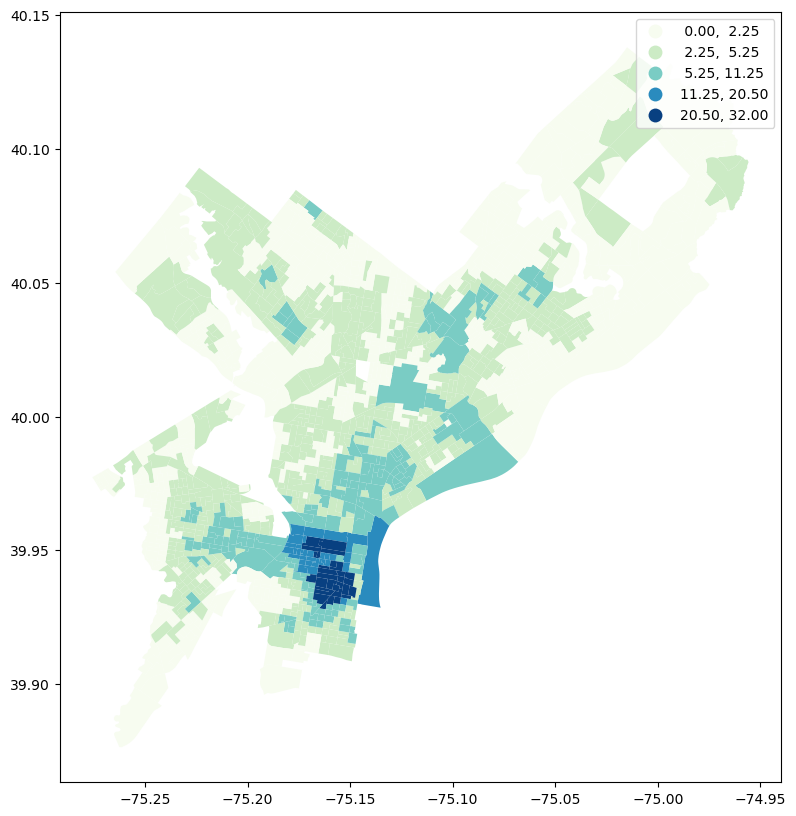

In [31]:
#simple plot creation with newly joined data 
blocks_food.plot(figsize=(12,10),
                  column='Total High Produce Supply',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='NaturalBreaks')



<AxesSubplot: >

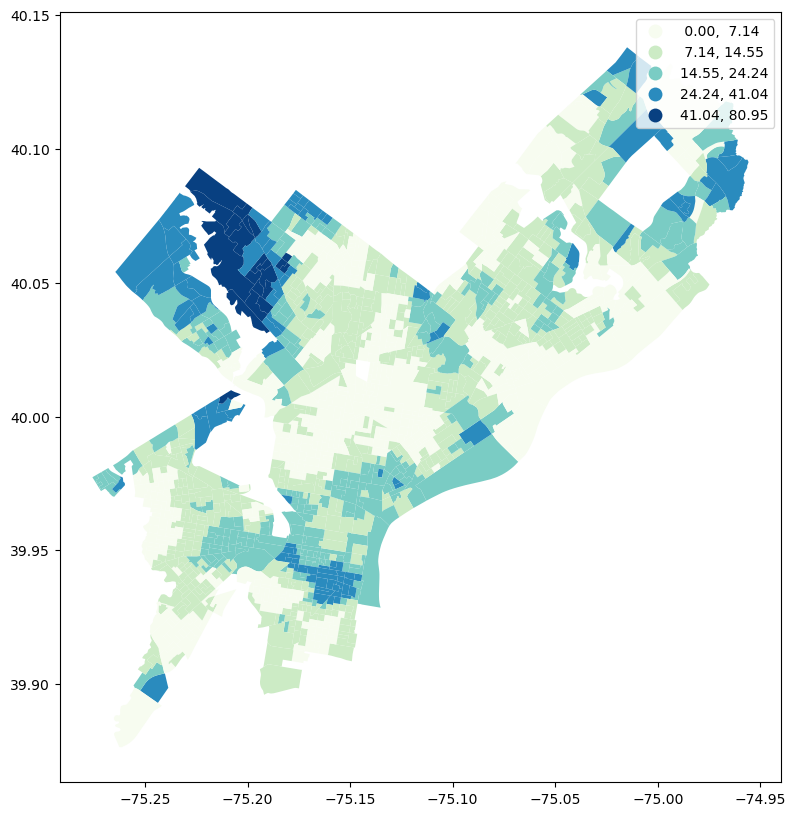

In [32]:
#simple plot creation with newly joined data 
blocks_food.plot(figsize=(12,10),
                  column='Percent High Produce Supply',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='NaturalBreaks')




<AxesSubplot: >

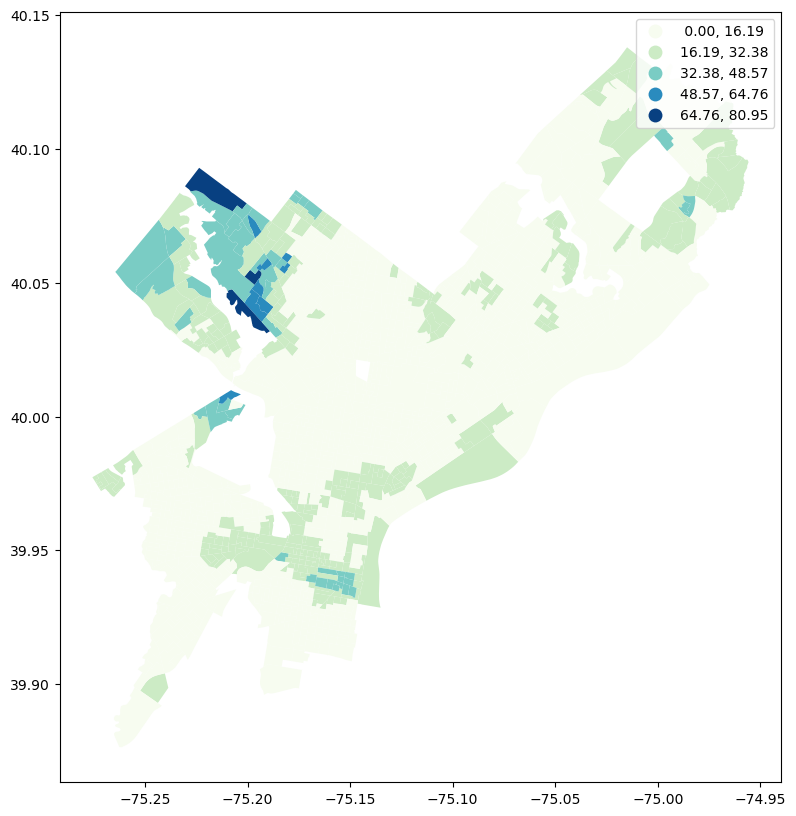

In [33]:
#simple plot creation with newly joined data 
blocks_food.plot(figsize=(12,10),
                  column='Percent High Produce Supply',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='equal_interval')

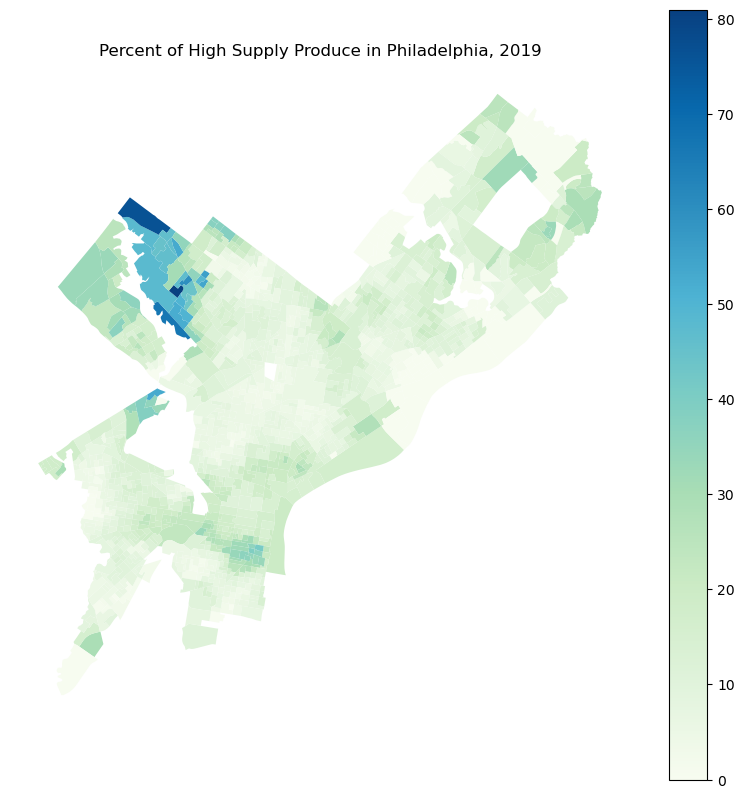

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
blocks_food.plot(ax=ax,
         column='Percent High Produce Supply',
         cmap='GnBu',
         legend=True,)
        

# add a title
ax.set_title('Percent of High Supply Produce in Philadelphia, 2019')

# get rid of the axis
ax.axis('off');

In [35]:
#read in a gejson file downloaded from the philly open data portal planning districts data 
districts=gpd.read_file('data/Planning_Districts.geojson')
districts.head()

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry
0,1,14,River Wards,RW,2.107270e+08,66931.595020,None,None,"POLYGON ((-75.09798 40.00496, -75.09687 40.005..."
1,2,3,North Delaware,NDEL,2.700915e+08,89213.074378,None,None,"POLYGON ((-74.98159 40.05363, -74.98139 40.053..."
2,3,0,Lower Far Northeast,LFNE,3.068529e+08,92703.285159,None,None,"POLYGON ((-74.96443 40.11728, -74.96434 40.117..."
3,4,9,Central,CTR,1.782880e+08,71405.143450,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967..."
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,None,None,"POLYGON ((-75.18742 39.96338, -75.18644 39.963..."


In [38]:
blocks_food.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1336 entries, 0 to 1335
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   FIPS                          1336 non-null   object  
 1   geometry                      1336 non-null   geometry
 2   Total Low Produce Supply      1325 non-null   float64 
 3   Low Produce Supply Per 1000   1325 non-null   float64 
 4   Total High Produce Supply     1325 non-null   float64 
 5   High Produce Supply Per 1000  1325 non-null   float64 
 6   Percent High Produce Supply   1325 non-null   float64 
 7   Percent Vehicle Availability  1326 non-null   float64 
 8   Total Restaurants             1336 non-null   int64   
 9   Percent Poverty               1327 non-null   float64 
 10  Shape Area                    1336 non-null   float64 
 11  Shape length                  1336 non-null   float64 
dtypes: float64(9), geometry(1), int64(1), ob

<AxesSubplot: >

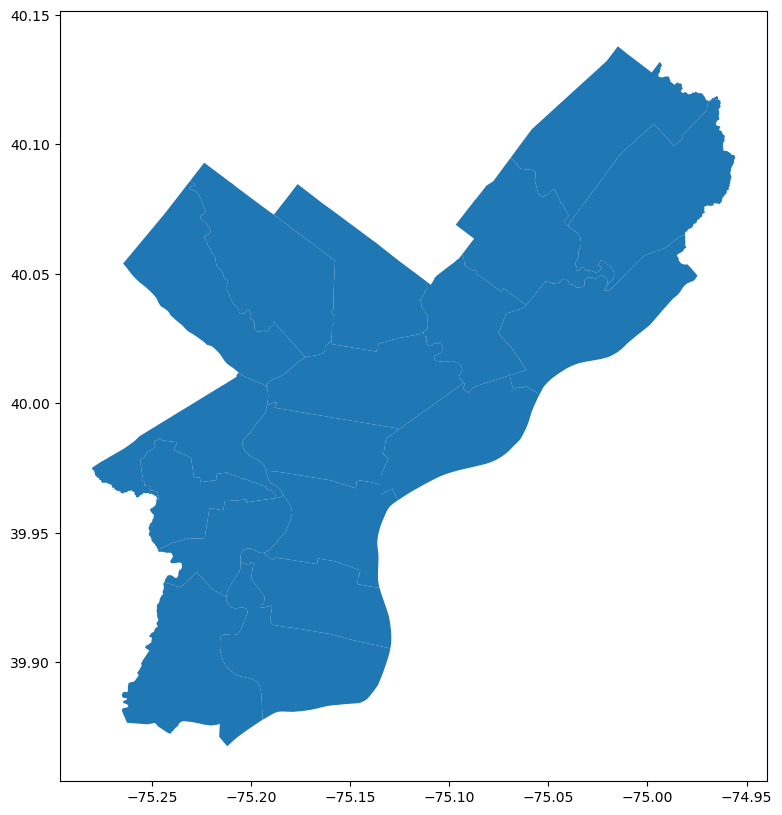

In [36]:
districts.plot(figsize=(12,10)) #plot districts

In [37]:
#more about the data 
districts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID_1     18 non-null     int64   
 1   OBJECTID       18 non-null     int64   
 2   DIST_NAME      18 non-null     object  
 3   ABBREV         18 non-null     object  
 4   Shape__Area    18 non-null     float64 
 5   Shape__Length  18 non-null     float64 
 6   PlanningDist   0 non-null      object  
 7   DaytimePop     0 non-null      object  
 8   geometry       18 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 1.4+ KB
